**What is Spark**

In [1]:
# https://chartio.com/learn/data-analytics/what-is-spark/

**Difference between Spark and MR**

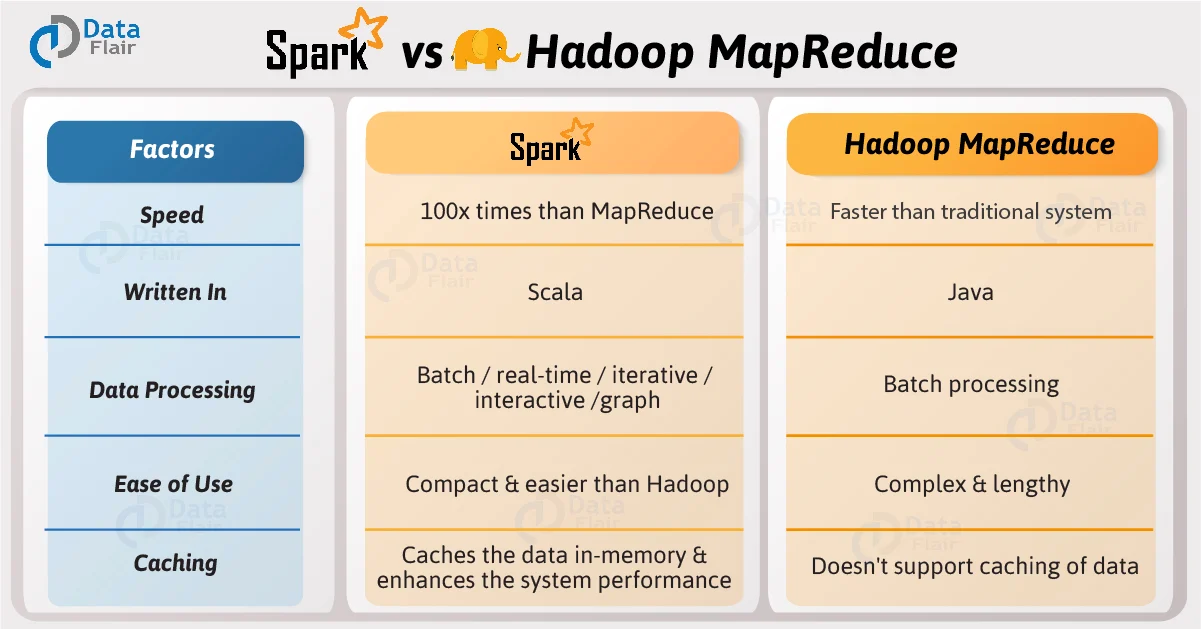

**Describe Spark Architecture**

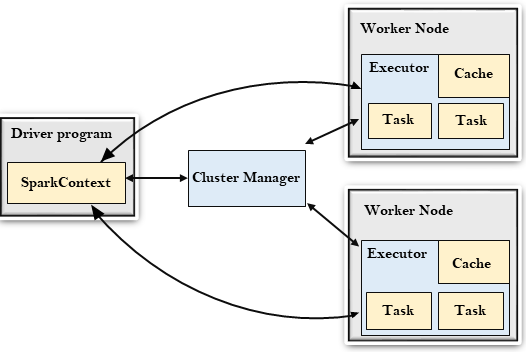

In [1]:
#https://www.youtube.com/watch?v=OlYKyZvN2FA

**What is RDD and How Spark Achieve Fault Tolerance**

Most important concept in ‘Fault tolerate Apache Spark’ is RDD.

Resilient Distributed Datasets.

Spark maintains a DAG (Directed Acyclic Graph), which is a 1 way graph connecting nodes. Where nodes depict the intermediate results you get from your transformations.

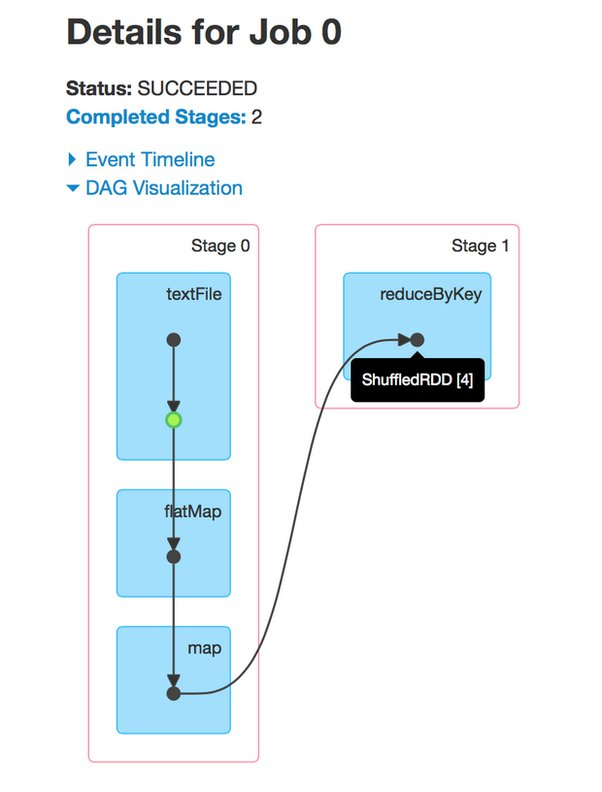

Any time your job fails the DAG is re-run from the nearest node of failure to re compute the RDD.

But as your DAG grows, you might want to checkpoint your RDD so that in case it fails in initial part, almost whole DAG isn’t re-run (spark bleeds for memory efficiency).

You might ask whats checkpoint. Its a technique where you store your RDD instantly and it works at file level instead of cache level unlike persist/cache operations.

Also, you should cache your RDD before checkpoint, because Spark re computes your RDD before checkpointing it and thus its run 2 times , and when you cache it Spark will simply store the cached RDD in memory. And thus in case of failure spark will simply load the latest checkpoint and you will have a fault tolerant system.

Now spark has fault tolerant feature at Resource manager and Master falure level too. that is achieved through ZOOKEEPER. You might wanna get into that as well.

**When to checkpoint**

As mentioned above, every time a computed partition needs to be cached, it is cached into memory. However, checkpoint does not follow the same principle. Instead, it waits until the end of a job, and launches another job to finish checkpoint. An RDD which needs to be checkpointed will be computed twice; thus it is suggested to do a rdd.cache() before rdd.checkpoint(). In this case, the second job will not recompute the RDD. Instead, it will just read cache. In fact, Spark offers rdd.persist(StorageLevel.DISK_ONLY) method, like caching on disk. Thus, it caches RDD on disk during its first computation, but this kind of persist and checkpoint are different, we will discuss the difference later.

**What is Transformation and Action in Spark**

In [ ]:
#https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/

**Difference Between Narrow and Wide Transformation**

In [ ]:
#https://data-flair.training/blogs/spark-rdd-operations-transformations-actions/

**Difference between DAG and Lineage Graph**

**what is partition and how spark partition the data?**

In [ ]:
#https://www.projectpro.io/article/how-data-partitioning-in-spark-helps-achieve-more-parallelism/297#:~:text=The%20best%20way%20to%20decide,utilized%20in%20an%20optimal%20way.

**what is Spark Core**

**How spark driver executor and RM works**

In [1]:
#https://blog.knoldus.com/understanding-the-working-of-spark-driver-and-executor/

**What is Spark Lazy evalution**

What is Lazy Evaluation?
First, Lazy Evaluation is not a concept Spark invented and has been around for a while and is just one of many evaluation strategies. In our context two will be useful to know:

Lazy Evaluation is an evaluation strategy that delays the evaluation of an expression until its value is needed.
Eager Evaluation is the evaluation strategy you’ll most probably be familiar with and is used in most programming languages. As opposed to Lazy Evaluation, the evaluation of an expression is performed as soon as it is encountered.
Let’s go back to Spark. In Spark, Lazy Evaluation means that You can apply as many TRANSFORMATIONs as you want, but Spark will not start the execution of the process until an ACTION is called.

💡 So transformations are lazy but actions are eager.

What is the difference between TRANSFORMATIONS and ACTIONS?
Transformations
Transformations are the instructions you use to modify the DataFrame in the way you want and are lazily executed. There are two types of transformations:

narrow transformations: the data it requires to be computed for a single partition exists in that same partition.
Examples: select , filter
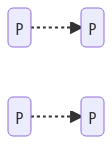

wide transformations: the data it requires to be computed for a single partition, may exist in multiple partitions.
Examples: groupBy , repartition
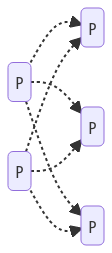
Actions
Actions are statements that will ask for a value to be computed immediately and are eager statements.
Examples: show , count , collect , save

💡 Typically, a transformation will take an RDD and return another RDD. Actions will take an RDD but will return something of different nature:

.---------------- ---------.
| Transformation | Actions |
| -------------- | ------- |
| select         | show    |
| distinct       | count   |
| groupBy        | collect |
| sum            | save    |
| orderBy        |         |
| where          |         |
| limit          |         |
.---------------- ---------.
Spark’s Catalyst Optimizer
Before Talking about actual advantages, let’s quickly talk about Spark’s Catalyst Optimizer.

When performing different transformations, Spark will store them in a Directed Acyclic Graph (or DAG). You could actually look at the DAG in the SparkUI. Here’s a simplified example of what it might loosely look like:


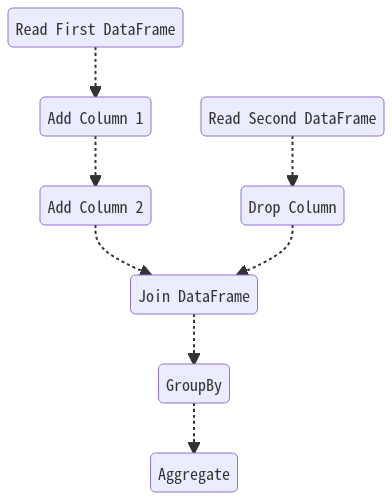
Once the DAG is constructed, Spark’s catalyst optimizer will perform a set of rule-based and cost-based optimizations to determine a logical and then physical plan of execution.


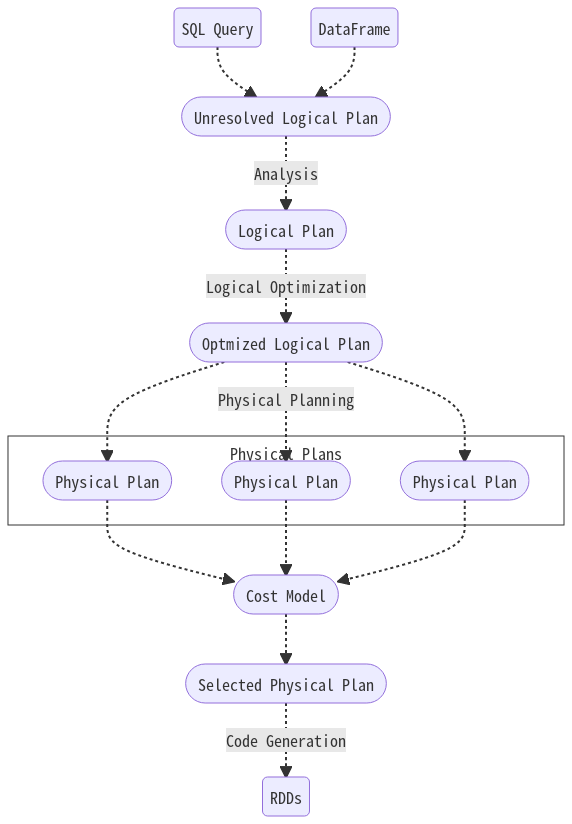
Clearly, this is a very simplified version, but it will be enough for our purpose. If you want more details, you can check out this post on Databricks’s blog.

What are the advantages of using Lazy Evaluation?
Amongst the advantages of using lazy evaluation we find these three:

1. Improve Efficiency
Spark’s Catalyst optimizer will group operations together, reducing the number of passes on data and improving performance.

One more advantage of the catalyst optimizer is that, often, values that won’t be used for the final result, will simply not be computed.

Time for an example. Let’s first define some dataframe:
columns = ["name","age"]
data = [("Alain",34),
        ("Ahmed",45),
        ("Ines",30),
        ("Fatima",28),
        ("Marie",40)]

df = spark.createDataFrame(data).toDF(*columns)

Now if we add a column “gender” and then overwrite it immediately afterward:
from pyspark.sql.functions as F
from itertools import chain

mapping = {'Alain': 'm', 'Ahmed': 'm', 'Ines': 'f', 'Fatima': 'f', 'Marie': 'f'}


gender_mapping = create_map([lit(x) for x in chain(*mapping.items())])

df.withColumn('gender', gender_mapping.getItem(F.col("name")))\  # First definition
  .withColumn('gender', F.lit('Unknown'))\  # Second definition: overwrite the first one
  .explain(True) 

Spark will automatically group these operations together and therefore ignore the first definition as it is not actually used in the final result. A quick look at the Logical vs Physical Plan will make it clearer:


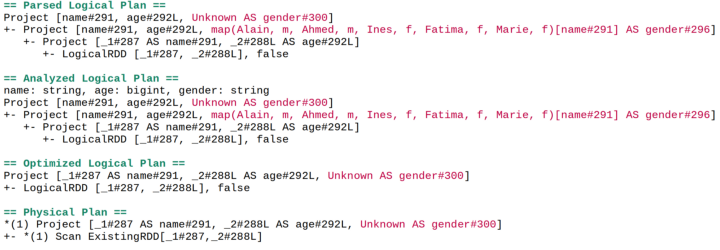
All of this will also optimize driver and cluster communications, and speed up the program.

📔 Check out this blog post for more detailed examples.

2. Better readability
Since you know that Spark will group operations together and optimize the code behind the scenes, you can organize your program using smaller operations which will improve the code readability and maintenance.

3. Memory Management
If Spark’s transformations were eager, you would have to store all the intermediate Dataframes/RDDs somewhere or at the very least managing memory will become another concern of yours.

With Lazy Evaluation, Spark will only store intermediate results for the time they are actually needed.

Obviously, you could circumvent this behavior manually if needed by caching or exporting the results. But most of the time, intermediary results are “intermediary” and do not need to be stored.

#https://towardsdatascience.com/3-reasons-why-sparks-lazy-evaluation-is-useful-ed06e27360c4#:~:text=In%20Spark%2C%20Lazy%20Evaluation%20means,lazy%20but%20actions%20are%20eager.

**What is Pair RDD**

Spark provides special operations on RDDs containing key/value pairs. These RDDs are called pair RDDs. Pair RDDs are a useful building block in many programs, as they expose operations that allow you to act on each key in parallel or regroup data across the network. For example, pair RDDs have a reduceByKey() method that can aggregate data separately for each key, and a join() method that can merge two RDDs together by grouping elements with the same key. It is common to extract fields from an RDD (representing, for instance, an event time, customer ID, or other identifier) and use those fields as keys in pair RDD operations.

Creating a Pair RDD
pairs = lines.map(lambda x: (x.split(" ")[0], x))

**what is the difference between cache and persists**

Using cache() and persist() methods, Spark provides an optimization mechanism to store the intermediate computation of an RDD, DataFrame, and Dataset so they can be reused in subsequent actions(reusing the RDD, Dataframe, and Dataset computation result’s).

Both caching and persisting are used to save the Spark RDD, Dataframe, and Dataset’s. But, the difference is, RDD cache() method default saves it to memory (MEMORY_ONLY) whereas persist() method is used to store it to the user-defined storage level.

When you persist a dataset, each node stores its partitioned data in memory and reuses them in other actions on that dataset. And Spark’s persisted data on nodes are fault-tolerant meaning if any partition of a Dataset is lost, it will automatically be recomputed using the original transformations that created it.

https://sparkbyexamples.com/spark/spark-difference-between-cache-and-persist/#:~:text=Spark%20Cache%20vs%20Persist&text=Both%20caching%20and%20persisting%20are,the%20user%2Ddefined%20storage%20level.

**what is serialization and deserialization? Kryo or java based serialization?**

In [1]:
# https://selectfrom.dev/apache-spark-all-about-serialization-f84f38c99f5b

**Difference between Map and FlatMap**

**What are the various levels of persistence in spark**

In [ ]:
#https://sparkbyexamples.com/spark/spark-persistence-storage-levels/

**What is Accumulator in Spark?**

In [ ]:
#https://www.hadoopinrealworld.com/what-are-accumulators-in-spark-when-and-when-not-to-use-them/
#https://sparkbyexamples.com/spark/spark-accumulators/

**What is Broadcast vriable**

In [ ]:
#https://www.hadoopinrealworld.com/what-are-broadcast-variables-in-spark-and-when-to-use-them/

**What is checkpointing in Spark?**

In [ ]:
#https://data-flair.training/blogs/spark-streaming-checkpoint/

**What is Executor memory?**

**Resource Allocation configurations for a Spark application**

Resource Allocation is an important aspect during the execution of any spark job. If not configured correctly, a spark job can consume entire cluster resources and make other applications starve for resources.

This blog helps to understand the basic flow in a Spark Application and then how to configure the number of executors, memory settings of each executors and the number of cores for a Spark Job. There are a few factors that we need to consider to decide the optimum numbers for the above three, like:

The amount of data
The time in which a job has to complete
Static or dynamic allocation of resources
Upstream or downstream application
 

Introduction
 

Let’s start with some basic definitions of the terms used in handling Spark applications.

Partitions : A partition is a small chunk of a large distributed data set. Spark manages data using partitions that helps parallelize data processing with minimal data shuffle across the executors.

Task : A task is a unit of work that can be run on a partition of a distributed dataset and gets executed on a single executor. The unit of parallel execution is at the task level.All the tasks with-in a single stage can be executed in parallel

Executor : An executor is a single JVM process which is launched for an application on a worker node. Executor runs tasks and keeps data in memory or disk storage across them. Each application has its own executors. A single node can run multiple executors and executors for an application can span multiple worker nodes. An executor stays up for the
duration of the Spark Application and runs the tasks in multiple threads. The number of executors for a spark application can be specified inside the SparkConf or via the flag –num-executors from command-line.

Cluster Manager : An external service for acquiring resources on the cluster (e.g. standalone manager, Mesos, YARN). Spark is agnostic to a cluster manager as long as it can acquire executor processes and those can communicate with each other.We are primarily interested in Yarn as the cluster manager. A spark cluster can run in either yarn cluster or yarn-client mode:

yarn-client mode – A driver runs on client process, Application Master is only used for requesting resources from YARN.

yarn-cluster mode – A driver runs inside application master process, client goes away once the application is initialized

Cores : A core is a basic computation unit of CPU and a CPU may have one or more cores to perform tasks at a given time. The more cores we have, the more work we can do. In spark, this controls the number of parallel tasks an executor can run.

 



 

Steps involved in cluster mode for a Spark Job
From the driver code, SparkContext connects to cluster manager (standalone/Mesos/YARN).
Cluster Manager allocates resources across the other applications. Any cluster manager can be used as long as the executor processes are running and they communicate with each other.
Spark acquires executors on nodes in cluster. Here each application will get its own executor processes.
Application code (jar/python files/python egg files) is sent to executors
Tasks are sent by SparkContext to the executors.
 

From the above steps, it is clear that the number of executors and their memory setting play a major role in a spark job. Running executors with too much memory often results in excessive garbage collection delays

Now we try to understand, how to configure the best set of values to optimize a spark job.

There are two ways in which we configure the executor and core details to the Spark job. They are:

Static Allocation – The values are given as part of spark-submit
Dynamic Allocation – The values are picked up based on the requirement (size of data, amount of computations needed) and released after use. This helps the resources to be re-used for other applications.
 

Static Allocation
 

Different cases are discussed varying different parameters and arriving at different combinations as per user/data requirements.

 

Case 1 Hardware – 6 Nodes and each node have 16 cores, 64 GB RAM
First on each node, 1 core and 1 GB is needed for Operating System and Hadoop Daemons, so we have 15 cores, 63 GB RAM for each node

We start with how to choose number of cores:

Number of cores = Concurrent tasks an executor can run

So we might think, more concurrent tasks for each executor will give better performance. But research shows that any application with more than 5 concurrent tasks, would lead to a bad show. So the optimal value is 5.

This number comes from the ability of an executor to run parallel tasks and not from how many cores a system has. So the number 5 stays same even if we have double (32) cores in the CPU

Number of executors:

Coming to the next step, with 5 as cores per executor, and 15 as total available cores in one node (CPU) – we come to 3 executors per node which is 15/5. We need to calculate the number of executors on each node and then get the total number for the job.

So with 6 nodes, and 3 executors per node – we get a total of 18 executors. Out of 18 we need 1 executor (java process) for Application Master in YARN. So final number is 17 executors

This 17 is the number we give to spark using –num-executors while running from spark-submit shell command

Memory for each executor:

From above step, we have 3 executors per node. And available RAM on each node is 63 GB

So memory for each executor in each node is 63/3 = 21GB.

However small overhead memory is also needed to determine the full memory request to YARN for each executor.

The formula for that overhead is max(384, .07 * spark.executor.memory)

Calculating that overhead:  .07 * 21 (Here 21 is calculated as above 63/3) = 1.47

Since 1.47 GB > 384 MB, the overhead is 1.47

Take the above from each 21 above => 21 – 1.47 ~ 19 GB

So executor memory – 19 GB

Final numbers – Executors – 17, Cores 5, Executor Memory – 19 GB

 

Case 2 Hardware – 6 Nodes and Each node have 32 Cores, 64 GB
 

Number of cores of 5 is same for good concurrency as explained above.

Number of executors for each node = 32/5 ~ 6

So total executors = 6 * 6 Nodes = 36. Then final number is 36 – 1(for AM) = 35

Executor memory:

6 executors for each node. 63/6 ~ 10. Overhead is .07 * 10 = 700 MB. So rounding to 1GB as overhead, we get 10-1 = 9 GB

Final numbers – Executors – 35, Cores 5, Executor Memory – 9 GB

 

Case 3 – When more memory is not required for the executors
 

The above scenarios start with accepting number of cores as fixed and moving to the number of executors and memory.

Now for the first case, if we think we do not need 19 GB, and just 10 GB is sufficient based on the data size and computations involved, then following are the numbers:

Cores: 5

Number of executors for each node = 3. Still 15/5 as calculated above.

At this stage, this would lead to 21 GB, and then 19 as per our first calculation. But since we thought 10 is ok (assume little overhead), then we cannot switch the number of executors per node to 6 (like 63/10). Because with 6 executors per node and 5 cores it comes down to 30 cores per node, when we only have 16 cores. So we also need to change number of cores for each executor.

So calculating again,

The magic number 5 comes to 3 (any number less than or equal to 5). So with 3 cores, and 15 available cores – we get 5 executors per node, 29 executors ( which is  (5*6 -1)) and memory is 63/5 ~ 12.

Overhead is 12*.07=.84. So executor memory is 12 – 1 GB = 11 GB

Final Numbers are 29 executors, 3 cores, executor memory is 11 GB

 

Summary Table
 

screen-shot-2016-12-06-at-11-58-15-pm
 

Dynamic Allocation
 

Note: Upper bound for the number of executors if dynamic allocation is enabled is infinity. So this says that spark application can eat away all the resources if needed. In a cluster where we have other applications running and they also need cores to run the tasks, we need to make sure that we assign the cores at cluster level.

 

This means that we can allocate specific number of cores for YARN based applications based on user access. So we can create a spark_user and then give cores (min/max) for that user. These limits are for sharing between spark and other applications which run on YARN.

To understand dynamic allocation, we need to have knowledge of the following properties:

spark.dynamicAllocation.enabled – when this is set to true we need not mention executors. The reason is below:

The static parameter numbers we give at spark-submit is for the entire job duration. However if dynamic allocation comes into picture, there would be different stages like the following:

What is the number for executors to start with:

Initial number of executors (spark.dynamicAllocation.initialExecutors) to start with

 Controlling the number of executors dynamically:

Then based on load (tasks pending) how many executors to request. This would eventually be the number what we give at spark-submit in static way. So once the initial executor numbers are set, we go to min (spark.dynamicAllocation.minExecutors) and max (spark.dynamicAllocation.maxExecutors) numbers.

 When to ask new executors or give away current executors:

When do we request new executors (spark.dynamicAllocation.schedulerBacklogTimeout) – This means that there have been pending tasks for this much duration. So the request for the number of executors requested in each round increases exponentially from the previous round. For instance, an application will add 1 executor in the first round, and then 2, 4, 8 and so on executors in the subsequent rounds. At a specific point, the above property max comes into picture.

When do we give away an executor is set using spark.dynamicAllocation.executorIdleTimeout.

To conclude, if we need more control over the job execution time, monitor the job for unexpected data volume the static numbers would help. By moving to dynamic, the resources would be used at the background and the jobs involving unexpected volumes might affect other applications.

#http://site.clairvoyantsoft.com/understanding-resource-allocation-configurations-spark-application/

**Explain Spark Stages**

https://www.youtube.com/watch?v=1BaGOCPA7OA

**Difference between caolesce and repartition?**

https://stackoverflow.com/questions/31610971/spark-repartition-vs-coalesce

https://www.youtube.com/watch?v=D6Ba5FJsLaQ

**What is Spark SQL**

Many data scientists, analysts, and general business intelligence users rely on interactive SQL queries for exploring data. Spark SQL is a Spark module for structured data processing. It provides a programming abstraction called DataFrames and can also act as a distributed SQL query engine. It enables unmodified Hadoop Hive queries to run up to 100x faster on existing deployments and data. It also provides powerful integration with the rest of the Spark ecosystem (e.g., integrating SQL query processing with machine learning).

https://www.youtube.com/watch?v=RCcGnsb9smw

https://spark.apache.org/docs/latest/sql-getting-started.html

**Difference between RDD vs DF vs DS**

https://www.analyticsvidhya.com/blog/2020/11/what-is-the-difference-between-rdds-dataframes-and-datasets/

**Difference between Spark SQl and Hive HQL?**

**What is Catalyst Optimizer**

https://www.youtube.com/watch?v=Dx_RdtI2I8E

**what is spark streaming**

Apache Spark Streaming is the previous generation of Apache Spark’s streaming engine. There are no longer updates to Spark Streaming and it’s a legacy project. There is a newer and easier to use streaming engine in Apache Spark called Structured Streaming. You should use Spark Structured Streaming for your streaming applications and pipelines. See Structured Streaming.
What is Spark Streaming?
Apache Spark Streaming is a scalable fault-tolerant streaming processing system that natively supports both batch and streaming workloads. Spark Streaming is an extension of the core Spark API that allows data engineers and data scientists to process real-time data from various sources including (but not limited to) Kafka, Flume, and Amazon Kinesis. This processed data can be pushed out to file systems, databases, and live dashboards. Its key abstraction is a Discretized Stream or, in short, a DStream, which represents a stream of data divided into small batches. DStreams are built on RDDs, Spark’s core data abstraction. This allows Spark Streaming to seamlessly integrate with any other Spark components like MLlib and Spark SQL. Spark Streaming is different from other systems that either have a processing engine designed only for streaming, or have similar batch and streaming APIs but compile internally to different engines. Spark’s single execution engine and unified programming model for batch and streaming lead to some unique benefits over other traditional streaming systems.

Four Major Aspects of Spark Streaming

Fast recovery from failures and stragglers

Better load balancing and resource usage

Combining of streaming data with static datasets and interactive queries

Native integration with advanced processing libraries (SQL, machine learning, graph processing)

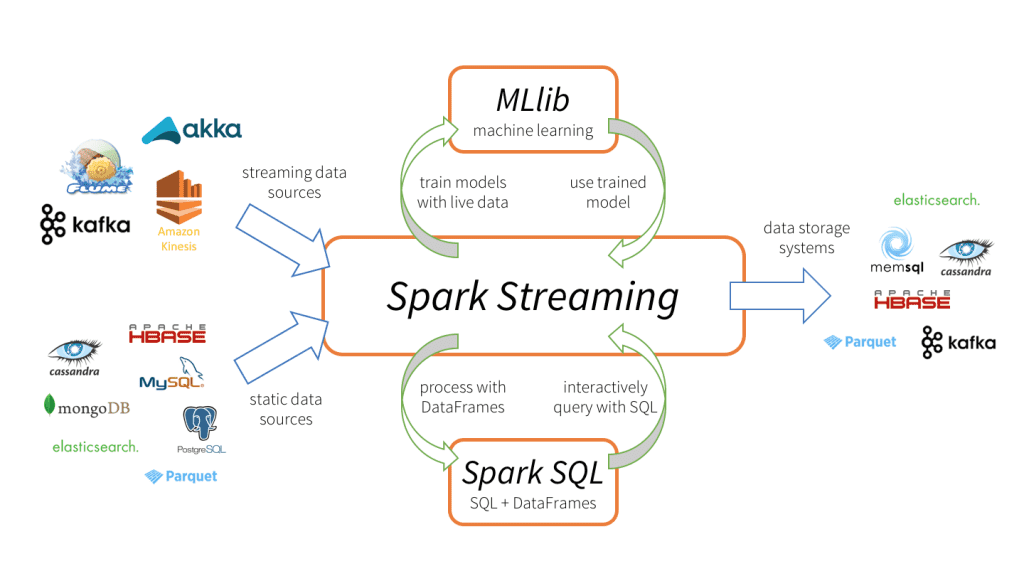

Apache Spark Streaming Ecosystem DiagramThis unification of disparate data processing capabilities is the key reason behind Spark Streaming’s rapid adoption. It makes it very easy for developers to use a single framework to satisfy all their processing needs.

**What is DStream**

**what is checkpointing spark streaming**

**How to create micro batch and what is the benefits?**

Micro batching is defined as the procedure in which the incoming stream of messages is processed by dividing them into group of small batches. This helps to achieve the performance benefits of batch processing; however, at the same time, it helps to keep the latency of processing of each message minimal.

Here, an incoming stream of messages is treated as a flow of small batches of messages and each batch is passed to a processing engine, which outputs a processed stream of batches.

In Spark Streaming, a micro batch is created based on time instead of size, that is, events received in a certain time interval, usually 

In [ ]:
# https://www.linkedin.com/pulse/micro-batching-vs-streaming-amit-tomar/

*****SCALA*****

**what is scala and its advantages**

Scala programming is a general-purpose computer language that supports both object-oriented and functional styles of programming on a larger scale. Scala is a strong static type of programming language and is influenced by the Java programming language

Scalability:
‘Scala’ is a portmanteau of ‘scalable’ and ‘language’, as we’ve discussed. So, scalability is definitely one of biggest Scala advantages. This means we can use it to build highly concurrent, fault-tolerant systems. For this, we can use the multiagent concurrency model like in Language Erlang in Akka.

Mixins, Open Classes, and Monkey Patching:
Some other facilities you will get with Scala are mixins(traits), open classes, and monkey patching. Using mixins, you can carry out multiple inheritances.

Highly Functional
Scala is highly functional in paradigm, is one of the unique Scala advantages. It is a language that treats its functions as first-class citizens. This means we can say that it has first-class functions. In other words, it lets us pass functions as arguments to other functions, and to return them as values from other functions.



**what is statistically typed and dynamically typed**

A programming language is called statically typed if the type of a variable is known at compile time: this also means that, as a programmer, you must specify what the type of each variable is. For example, Scala, Java, C, OCaml, Haskell, and C++, and so on. On the other hand, Perl, Ruby, Python, and so on are dynamically typed languages, where the type is not associated with the variables or fields, but with the runtime values.



**The difference between val and var?**

**What is Type Inference in Scala**

In [ ]:
# https://www.baeldung.com/scala/type-inference

**What is Unit type in scala**

In [ ]:
#https://www.educba.com/scala-unit/

**What is Scala Singleton object**

In [ ]:
#https://docs.scala-lang.org/tour/singleton-objects.html

**What is companion class?**

https://docs.scala-lang.org/tour/singleton-objects.html

Companion object is known as an object whose name is same as the name of the class. Or In other words, when an object and a class have the same name, then that object is known as the companion object and the class is known as companion class. A companion object is defined in the same source file in which the class is defined. A companion object is allowed to access both private methods and private fields of the class.

In [ ]:
#https://docs.scala-lang.org/overviews/scala-book/companion-objects.html

**What is Scala Map?**

Map is a collection of key-value pairs. In other words, it is similar to dictionary. Keys are always unique while values need not be unique. Key-value pairs can have any data type. However, data type once used for any key and value must be consistent throughout. Maps are classified into two types: mutable and immutable. By default Scala uses immutable Map. In order to use mutable Map, we must import scala.collection.mutable.Map class explicitly.

// Immutable
variable = Map(key_1 -> value_1, key_2 -> value_2,
 key_3 -> value_3, ....)

// Mutable
variable = scala.collection.mutable.Map(key_1 -> value_1, 
key_2 -> value_2, key_3 -> value_3, ....)

https://www.geeksforgeeks.org/scala-map/

**What is Scala Set**

Scala Set is a collection of pairwise different elements of the same type. In other words, a Set is a collection that contains no duplicate elements. There are two kinds of Sets, the immutable and the mutable. The difference between mutable and immutable objects is that when an object is immutable, the object itself can't be changed.

By default, Scala uses the immutable Set. If you want to use the mutable Set, you'll have to import scala.collection.mutable.Set class explicitly. If you want to use both mutable and immutable sets in the same collection, then you can continue to refer to the immutable Set as Set but you can refer to the mutable Set as mutable.Set.

Here is how you can declare immutable Sets −


// Empty set of integer type
var s : Set[Int] = Set()

// Set of integer type
var s : Set[Int] = Set(1,3,5,7)

or 

var s = Set(1,3,5,7)

https://www.geeksforgeeks.org/set-in-scala-set-1/

**What is Scala tuples**

**what is scala case class**

In [ ]:
# https://docs.scala-lang.org/tour/case-classes.html


**What is Scala Option**

**What is the use of App class in scala**

**Difference between Nil, Null, None, Nothing?**

In this tutorial, we’ll show the differences between Nil, Null, Nothing, Unit, and None types in Scala.

Although it may seem like all these keywords are used for representing the absence of a value, each one has its own purpose.

The null reference is used to represent an absent value, and Null with a capital ‘N’ is its type.

**Nil**

Nil is Considered as a List which has zero elements in it. The type of Nil is List[Nothing] and as stated above, that Nothing has no instances, we can have a List which is confirmed to be desolated.

val myList = Nil
println("a list is initialized with length %s".format(myList.length))
output: a list is initialized with length 0

val consList = "A" :: "B" :: Nil //Nil can be used as terminator
print(consList)

List(A, B)

create empty list:
var lst = List.empty

**null-- The null reference**

val isAbsent: String = null
isAbsent.length//java.lang.NullPointerException
  ... 44 elided
  
  
 **Null- The type of null reference** 
 
 
class Person
val isAbsent: Null = null
val isString: String = isAbsent
val noList: List[Int] = isAbsent
val noPerson: Person = isAbsent



**What is Unit Type?**

**What is trait?**

**Difference between a trait and an abstract class?**

https://docs.scala-lang.org/overviews/scala-book/abstract-classes.html

**Call by value and call by name difference**

Call By Name vs Call By Value
Let us know focus on the important concept of Call By Name versus Call By Value. This concept is significant in programming as you might be facing it while reading other people’s code, and it could be confusing. Of course, you can use it in your code as well. For understanding that let us consider the following two simple function code snippets:

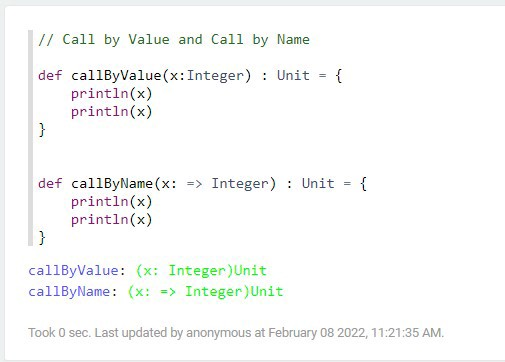

Principally, both of these functions are performing the same thing but they have a subtle difference, and it is the usage of “=>”. Actually, the “=>” makes the input to be lazily evaluated i.e., to be evaluated at a later stage. To get this more clearer, let us use the scala.util.Random.nextInt to generate a random number. If we call the above functions and give a random number as the input, surprisingly, we will get different values:

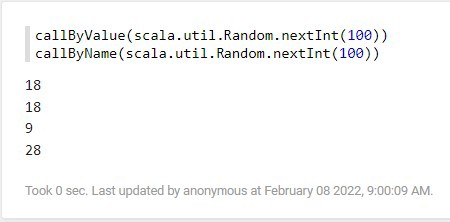

So, what does this mean?

Calling the function callByValue evaluates scala.util.Random.nextInt(100) first and send the value of 18 into the function. So, the function callByValue prints it two times. However, the callByName strategy is slightly different, and it sends the “scala.util.Random.nextInt(100)” into the function, and in the end it is like instructing the compiler to generate two different random numbers. i.e., println(scala.util.Random.nextInt(100)).

**what is Higher Order function in scale?**

https://docs.scala-lang.org/tour/higher-order-functions.html

**What is Pure Function**

https://docs.scala-lang.org/scala3/book/fp-pure-functions.html

**What is Annonymous Function?**

https://docs.scala-lang.org/scala3/book/fun-anonymous-functions.html

**What is closure?**

https://www.learningjournal.guru/article/scala/functional-programming/closures/

**What is Currying in Scala**

Currying
When I first got started in FP, I got lost in some of the nomenclature, and “currying” was a particularly deep rabbit’s hole of “Time in My Life I Wish I Had Spent Differently.”

All that the theory of currying means is that a function that takes multiple arguments can be translated into a series of function calls that each take a single argument. In pseudocode, this means that an expression like this:

result = f(x)(y)(z)
is mathematically the same as something like this:

f1 = f(x)
f2 = f1(y)
result = f2(z)

**What is Tail Recursion**

In [ ]:
https://www.scala-exercises.org/scala_tutorial/tail_recursion
    
https://www.youtube.com/watch?v=2bRGmoZbK_Y    

**What is Yield in Scala**

https://www.educba.com/scala-yield/

**How to join Two tables in Dataframe**

In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import *

spark = SparkSession \
    .builder \
    .master('local') \
    .appName("goShop") \
    .getOrCreate()

spark.sparkContext.setLogLevel("ERROR")

df_json = spark.read \
    .format("json") \
    .option("path", "file:/home/itv003168/jobathon_click_data.json") \
    .load()

df_csv = spark.read \
    .format("csv") \
    .option("inferSchema", True) \
    .option("header", True) \
    .option("path", "file:/home/itv003168/jobathon_login_data.csv") \
    .load()

df_final = df_json.join(df_csv, on=['session_id'], how='left')

In [4]:
df_final.show()

+--------------------+--------------------+--------------------+--------------------+----------+---------------+-------+
|          session_id|          browser_id|    client_side_data|     event_date_time|event_type|login_date_time|user_id|
+--------------------+--------------------+--------------------+--------------------+----------+---------------+-------+
|BXaHGXYlHJjVcyx49...|np1VSCs0e0h5utWYw...|[https://www.gosh...|2022-08-02 08:41:...|  pageload|           null|   null|
|HSCp4uJWTSUt8whLn...|ulFDwWtfUxBWu9TKE...|[https://www.gosh...|2022-08-02 05:49:...|  pageload|           null|   null|
|ks2q6XlyWvlEOuBVP...|5ApjGIfsqzi66BJeC...|[https://www.gosh...|2022-08-02 04:01:...|  pageload|           null|   null|
|7yQ7NY80yCBoyvoWf...|fmhMaS22p4KeDjH60...|[https://www.gosh...|2022-07-31 03:08:...|  pageload|           null|   null|
|7yQ7NY80yCBoyvoWf...|fmhMaS22p4KeDjH60...|[https://www.gosh...|2022-07-31 03:09:...|  pageload|           null|   null|
|7yQ7NY80yCBoyvoWf...|fmhMaS22p4

**How to remove duplicates from dataframe**

**How to add column in Dataframe**

df.withColumn("CopiedColumn",col("salary")* -1)

**What is Rank, row_number and dense_rank in sql**

https://www.sqlshack.com/overview-of-sql-rank-functions/

**Find 2nd largest number in a table?**

**Find duplicate records in a record**

do group by on id and find count > 1

**How to write UDF in hive**

https://dwgeek.com/hive-udf-using-python-use-python-script-into-hive-example.html/

**How to convert RDD to DF**

The toDF() function of PySpark RDD is used to construct a
DataFrame from an existing RDD. The DataFrame is
constructed with the default column names "_1" and "_2" to
represent the two columns because RDD lacks columns.

dfFromRDD1 = rdd.toDF()

dfFromRDD1.printSchema()

Here, the printSchema() method gives you a database schema
without column namesroot

|-- _1: string (nullable = true)

|-- _2: string (nullable = true)

Use the toDF() function with column names as parameters to
pass column names to the DataFrame, as shown below.-

columns = ["language","users_count"]

dfFromRDD1 = rdd.toDF(columns)

dfFromRDD1.printSchema()

The above code snippet gives you the database schema with
the column namesroot

|-- language: string (nullable = true)

|-- users: string (nullable = true)

**How to create DF from csv file**

**Explain the use of StructType and StructField classes
in PySpark with examples.**

https://sparkbyexamples.com/pyspark/pyspark-structtype-and-structfield/

**What is the difference between UDF, UDAF and UDTF in Hive?**

https://www.hadoopinrealworld.com/what-is-the-difference-between-udf-udaf-and-udtf-in-hive/

**Explain PySpark UDF with the help of an example.**

https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/

**Discuss the map() transformation in PySpark**

https://sparkbyexamples.com/pyspark/pyspark-map-transformation/

**What is PySpark ArrayType? Explain with an example.**

https://sparkbyexamples.com/pyspark/pyspark-arraytype-column-with-examples/

**What is meant by PySpark MapType? How can you
create a MapType using StructType?**

https://sparkbyexamples.com/pyspark/pyspark-maptype-dict-examples/

**How can PySpark DataFrame be converted to Pandas
DataFrame?**

https://sparkbyexamples.com/pyspark/convert-pyspark-dataframe-to-pandas/

**What is the function of PySpark's pivot() method?**

https://sparkbyexamples.com/pyspark/pyspark-pivot-and-unpivot-dataframe/

**Under what scenarios are Client and Cluster modes
used for deployment?**

**What are some of the drawbacks of incorporating
Spark into applications?**

**How can data transfers be kept to a minimum while
using PySpark?**

**How to specify loading csv file with delimeter "|"**

**How to merge two Dataframe with different schema**

**how to deal with bad records in pyspark**

In [ ]:
https://medium.com/@sasidharan-r/how-to-handle-corrupt-or-bad-record-in-apache-spark-custom-logic-pyspark-aws-430ddec9bb41

https://www.projectpro.io/recipes/handle-corrupt-records-using-permissive-mode-spark-scala
    
https://gankrin.org/how-to-handle-bad-or-corrupt-records-in-apache-spark/

**What does the details & numbers on the progress bar signify in Spark-shell?**

**How to check if spark dataframe is empty?**

**how spark does memory management?**

In [1]:
#https://blogs.perficient.com/2020/08/25/key-components-calculations-for-spark-memory-management/

**how to setup hadoop cluster**

In [2]:
#https://dwbi.org/pages/180

**What is data Skewness and how to deal with it**

In [3]:
#https://itnext.io/handling-data-skew-in-apache-spark-9f56343e58e8

**what are the options if you want to purge external table**

In [4]:
# https://docs.cloudera.com/HDPDocuments/HDP3/HDP-3.1.4/using-hiveql/content/hive_drop_external_table_data.html